In [1]:
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(x):
    data = pd.read_csv(x)
    data = data.reindex(index=data.index[::-1])
    data.index = range(len(data))
    return data
    
def min_per_day(x):
    y = data.iloc[x].as_matrix()
    mpd = y[1:4].min()
    return mpd

def close_p(x):
    cp = data.iloc[x][4]
    return cp

def open_p(x):
    op = data.iloc[x][1]
    return op

In [3]:
def main_loop(data):
    #define variables
    initial_value = 1000000 #trade size--1000 shares of coca 'KO' stock, assume I have enough fund to buy 1000 shares
    mp = 0 #market position--indicate wheter I have any KO stocks on hands: 0 means none shares; 1 menas have shares
    iD = 0 #initial date--indicate the index of the first date during calculation 
    Ratio = np.zeros((51,2)) #profit ratio
    #data=read_data(y)
    for k in range(51):
        iD = 0
        initial_value = 1000000
        Stop_pct = 0.005 + k * 0.0001
        while (iD <= 820):        
            if mp == 0:
                df_temp = data[iD:iD+5]
                HH = df_temp['High'].max()
                #print HH
                iD = iD + 5
#            test = iD

#            for n in range(0,5):
#                if HH < open_p(iD+n):
#                    break
#            if test + 4 == iD + n:
#                iD = iD + n + 1
#                mp = 0

#            else:
#                iD = iD + n
            while HH > open_p(iD) and iD<=820:
                iD += 1
            #print iD
            ep = open_p(iD) #ep is entry price
            #print ep
            Ts = initial_value / ep
            #print Ts
            pp = ep #pp is the previous peak price
            mp = 1

            if mp == 1:
                if close_p(iD) > pp:
                    pp = close_p(iD)
                #print pp
                sp = pp * (1 - Stop_pct) #sp is the stop-point of trading, shares sold at this price
                iD = iD + 1

                while sp < min_per_day(iD) and iD<=820:
                    iD = iD + 1
                #print iD
                end_value = open_p(iD) * Ts #the value of my fund after selling all shares
                #print open_p(iD),end_value
                initial_value = end_value
                mp = 0
#    if mp == 1:
#        end_value = sp * Ts
#    if mp == 0:
#        end_value = initial_value
        Ratio[k][0] = Stop_pct
        Ratio[k][1] = (end_value - 1000000)/1000000
    
    Return_Ratio = pd.DataFrame({'Stop Precent':Ratio[:,0],'Return Ratio':Ratio[:,1],})
    Return_Ratio = Return_Ratio[['Stop Precent','Return Ratio']]
    print Return_Ratio
    
    fig, ax = plt.subplots()
    ax.plot(Ratio[:,0],Ratio[:,1])
    if len(data)==827:
        ax.set_title('Coca Return Ratio')
    if len(data)==828:
        ax.set_title('Pepsi Return Ratio')
    plt.show()
    #return Ratio
    
    
#main_loop()

    Stop Precent  Return Ratio
0         0.0050      0.013617
1         0.0051      0.013617
2         0.0052      0.013617
3         0.0053      0.013617
4         0.0054      0.013617
5         0.0055      0.013617
6         0.0056      0.013617
7         0.0057      0.012419
8         0.0058      0.012419
9         0.0059      0.012419
10        0.0060      0.012419
11        0.0061      0.012419
12        0.0062      0.012419
13        0.0063      0.002505
14        0.0064      0.002505
15        0.0065      0.002505
16        0.0066      0.003445
17        0.0067     -0.004287
18        0.0068     -0.004287
19        0.0069     -0.004287
20        0.0070     -0.004287
21        0.0071     -0.004287
22        0.0072     -0.004287
23        0.0073     -0.004287
24        0.0074     -0.004287
25        0.0075     -0.004287
26        0.0076     -0.004287
27        0.0077     -0.004287
28        0.0078     -0.004287
29        0.0079     -0.004287
30        0.0080     -0.004287
31      

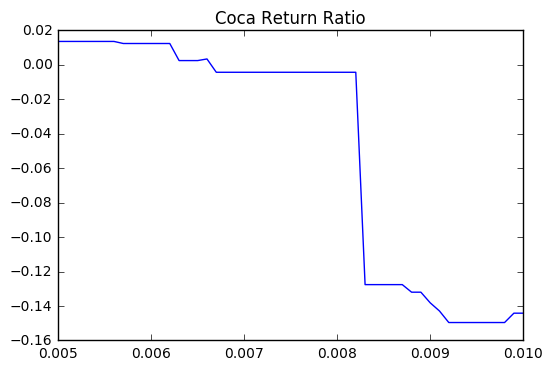

In [4]:
data = read_data('coca.csv')
main_loop(data)



    Stop Precent  Return Ratio
0         0.0050      0.096556
1         0.0051      0.115359
2         0.0052      0.115441
3         0.0053      0.115441
4         0.0054      0.115441
5         0.0055      0.115441
6         0.0056      0.115441
7         0.0057      0.115441
8         0.0058      0.099191
9         0.0059      0.099191
10        0.0060      0.099191
11        0.0061      0.099191
12        0.0062      0.099191
13        0.0063      0.099191
14        0.0064      0.099191
15        0.0065      0.099191
16        0.0066      0.099191
17        0.0067      0.099191
18        0.0068      0.099191
19        0.0069      0.099191
20        0.0070      0.099191
21        0.0071      0.099191
22        0.0072      0.099191
23        0.0073      0.099191
24        0.0074      0.099191
25        0.0075      0.099191
26        0.0076      0.099191
27        0.0077      0.099191
28        0.0078      0.099191
29        0.0079      0.099191
30        0.0080      0.099191
31      

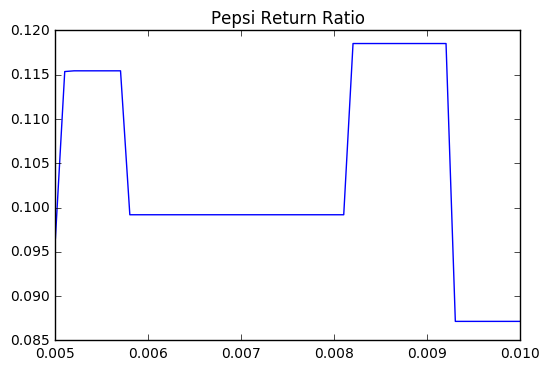

In [5]:
data=read_data('pep.csv')
main_loop(data)